# 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 2. Load dataset

The creditcard.csv dataset contains details of 284,807 transactions out of which 492 are fraudulent transactions.

The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

* Data has 31 features from V1-V28 & Time, Amount and Class

* Input features: V1-V28, Time and Amount

* Target variable: Class

In [2]:
# Load dataset
df = pd.read_csv('/content/sample_data/creditcard.csv')

Display the top 15 rows of the dataframe

In [3]:
# Display first few rows
df.head(15)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


# 3. Exploratory Data Analysis (EDA)

We now label the class feature as below

* Class==1 as Fraud
* Class==0 as Normal

In [4]:
# Label the class
Fraud = df[df.Class == 1]
Normal = df[df.Class == 0]

Let us count the number of transactions of each Class value in the specified target column.

* Normal Transactions (Class: 0) = 284,315
* Fraudulent Transactions (Class: 1) = 492

In [5]:
df['Class'].value_counts()

,count
Class,
0,284315
1,492


### Print the shape of the dataframe

In [6]:
# Display dataset shape
df.shape

(284807, 31)

In [7]:
print("Number of columns: {}".format(df.shape[1]))
print("Number of rows: {}".format(df.shape[0]))

Number of columns: 31
Number of rows: 284807


### Information about data
To get information about the DataFrame, including data types and non-null values count, we can use the info() method

In [8]:
# Display dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Summary statistics
To print summary statistics of the DataFrame (e.g., mean, min, max)

In [9]:
#For numerical columns
df_summary_numeric=df.describe()
df_summary_numeric

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,...,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# 4. Visualization

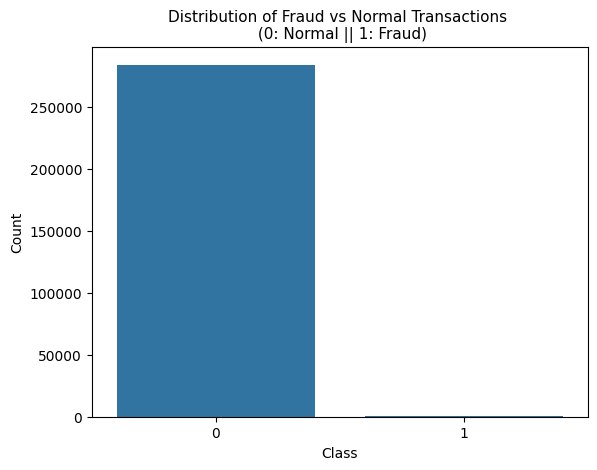

In [10]:
# Visualize the distribution of the target variable

value_counts = df['Class'].value_counts()

Class_barplot = sns.barplot(x=value_counts.index, y=value_counts.values)

plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Fraud vs Normal Transactions \n (0: Normal || 1: Fraud)', fontsize=11)
plt.show()


In [11]:
amount_summary = Fraud['Amount'].describe()

# Count of fraudulent transactions
fraud_count = Fraud.shape[0]
print(fraud_count)

492


In [12]:
amount_summary = Normal['Amount'].describe()

# Count of Normal transactions
normal_count = Normal.shape[0]
print(normal_count)

284315


Let us visualize the distribution of amount for "Fraud" Transactions via Histogram.

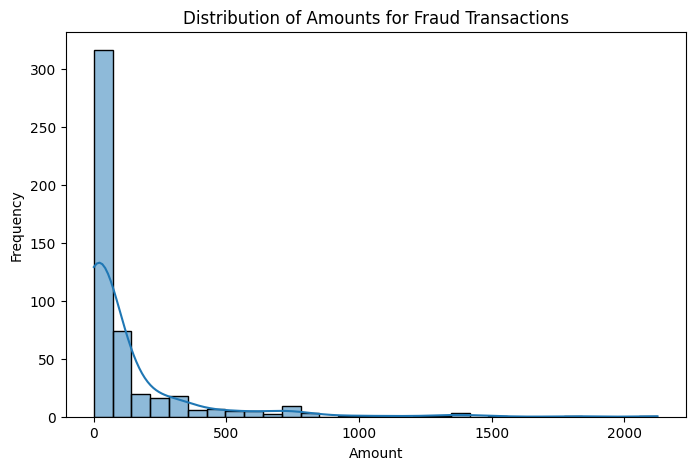

In [13]:
# Histogram
plt.figure(figsize=(8, 5))
sns.histplot(Fraud['Amount'], bins=30, kde=True)
plt.title('Distribution of Amounts for Fraud Transactions')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

Key Observations:

* **High Frequency of Small Amounts:** Most fraud transactions involve smaller amounts, as indicated by the highest bar (just above 300) for amounts close to zero.

* The fraud transaction amounts seems less than 2500.

* **Decreasing Frequency with Higher Amounts:** As the transaction amount increases, the frequency of fraud transactions decreases.

In [14]:
amount_more = 0
amount_less = 0

for i in range(df.shape[0]):
    if(df.iloc[i]["Amount"] < 2500):
        amount_less += 1
    else:
        amount_more += 1

print(amount_more)
print(amount_less)

449
284358


In [15]:
percentage = (amount_less/df.shape[0])*100
percentage

99.84234938045763

Hence, we observe that the 99.84% of transactions amount to less than 2500.


---


Let us see how many of these are fraud and others legitimate

In [16]:
# Classified transactions
fraud = 0
normal = 1

for i in range(df.shape[0]):
    if(df.iloc[i]["Amount"]<2500):
        if(df.iloc[i]["Class"] == 0):
            normal += 1
        else:
            fraud+=1

print(fraud)
print(normal)

492
283867


After which we can conclude that since the number of fraud transaction below the amount of 2500 is equivalent to the number of total fraud transactions, all fraud transactions therefore are less than 2500.

### **Correlation Matrix**
A correlation matrix is a table showing the correlation coefficients of many variables, most of them in one common data set. Each cell of the matrix expresses the correlation between any pair of variables, which can be valuable in determining relationships between them.

**Key Points about Correlation:**

A correlation coefficient is a numerical measure of the strength and direction of a linear relationship between two variables, usually from -1 to +1.

* +1: Perfect positive correlation (as one variable increases, the other one increases).
* 0: Nothing; no correlation (the variables are independent in linearity).
* -1: Perfect negative correlation (as one variable increases, the other decreases).

A heatmap - highly effective way of presenting the correlation matrix and making basic relationships between the variables quickly assessed without going into tedious readings of numerical terms.

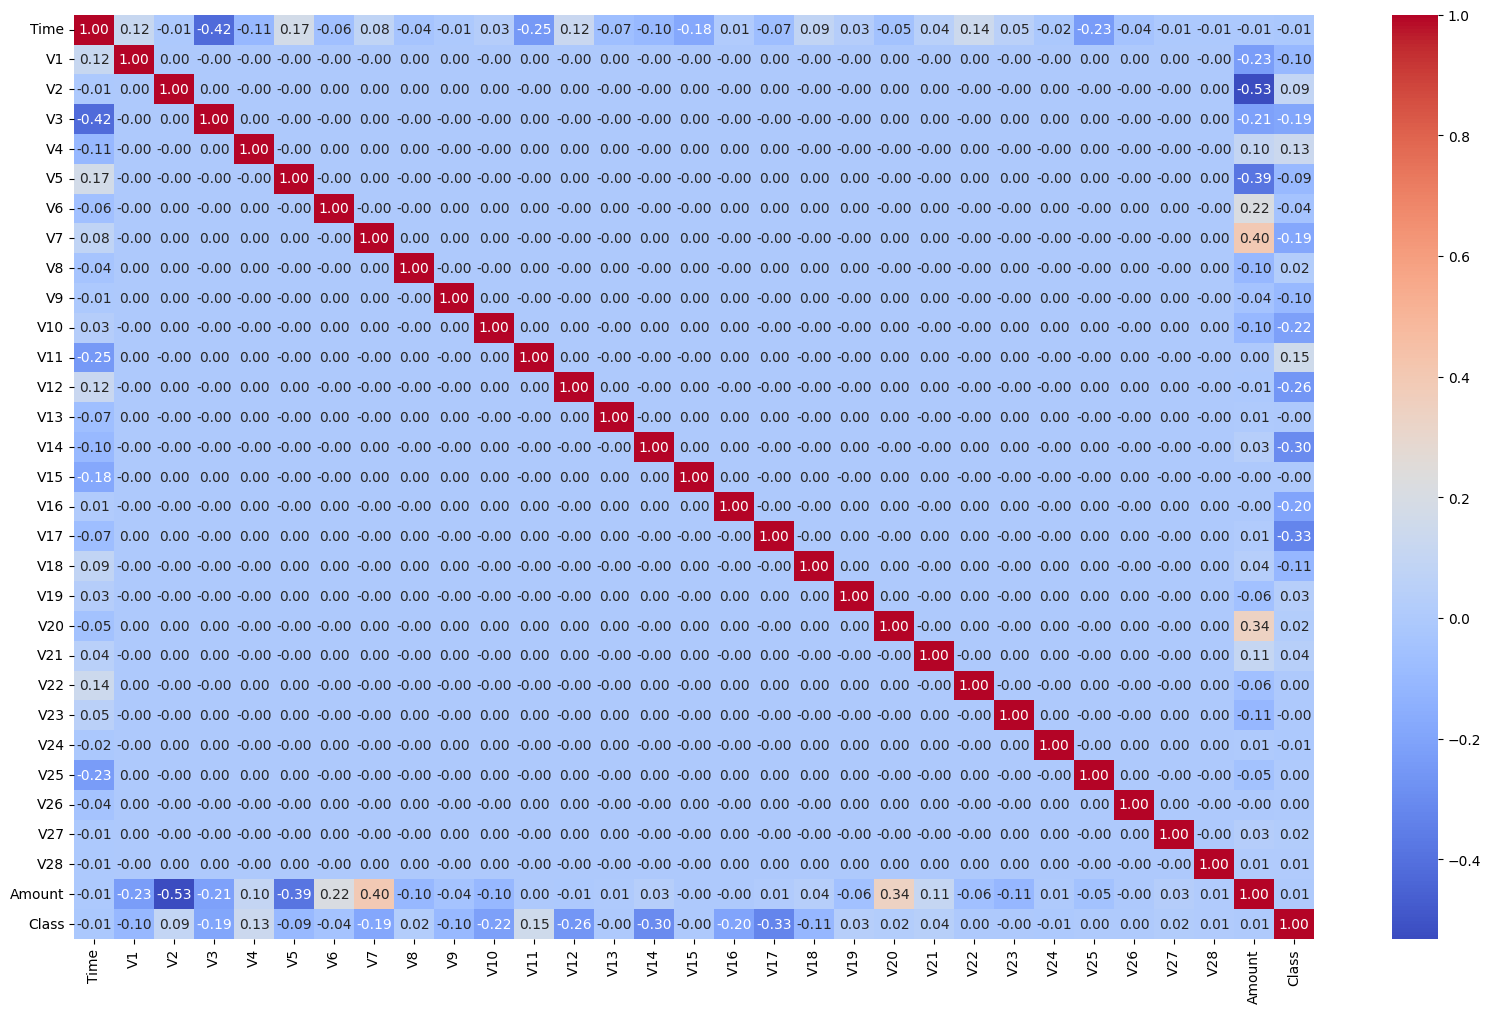

In [17]:
plt.figure(figsize=(20, 12))
corr = df.corr(numeric_only=True)
correlation_heatmap=sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            annot=True,
             cmap='coolwarm', fmt=".2f")
plt.show()


### **Histograms of all numerical columns**

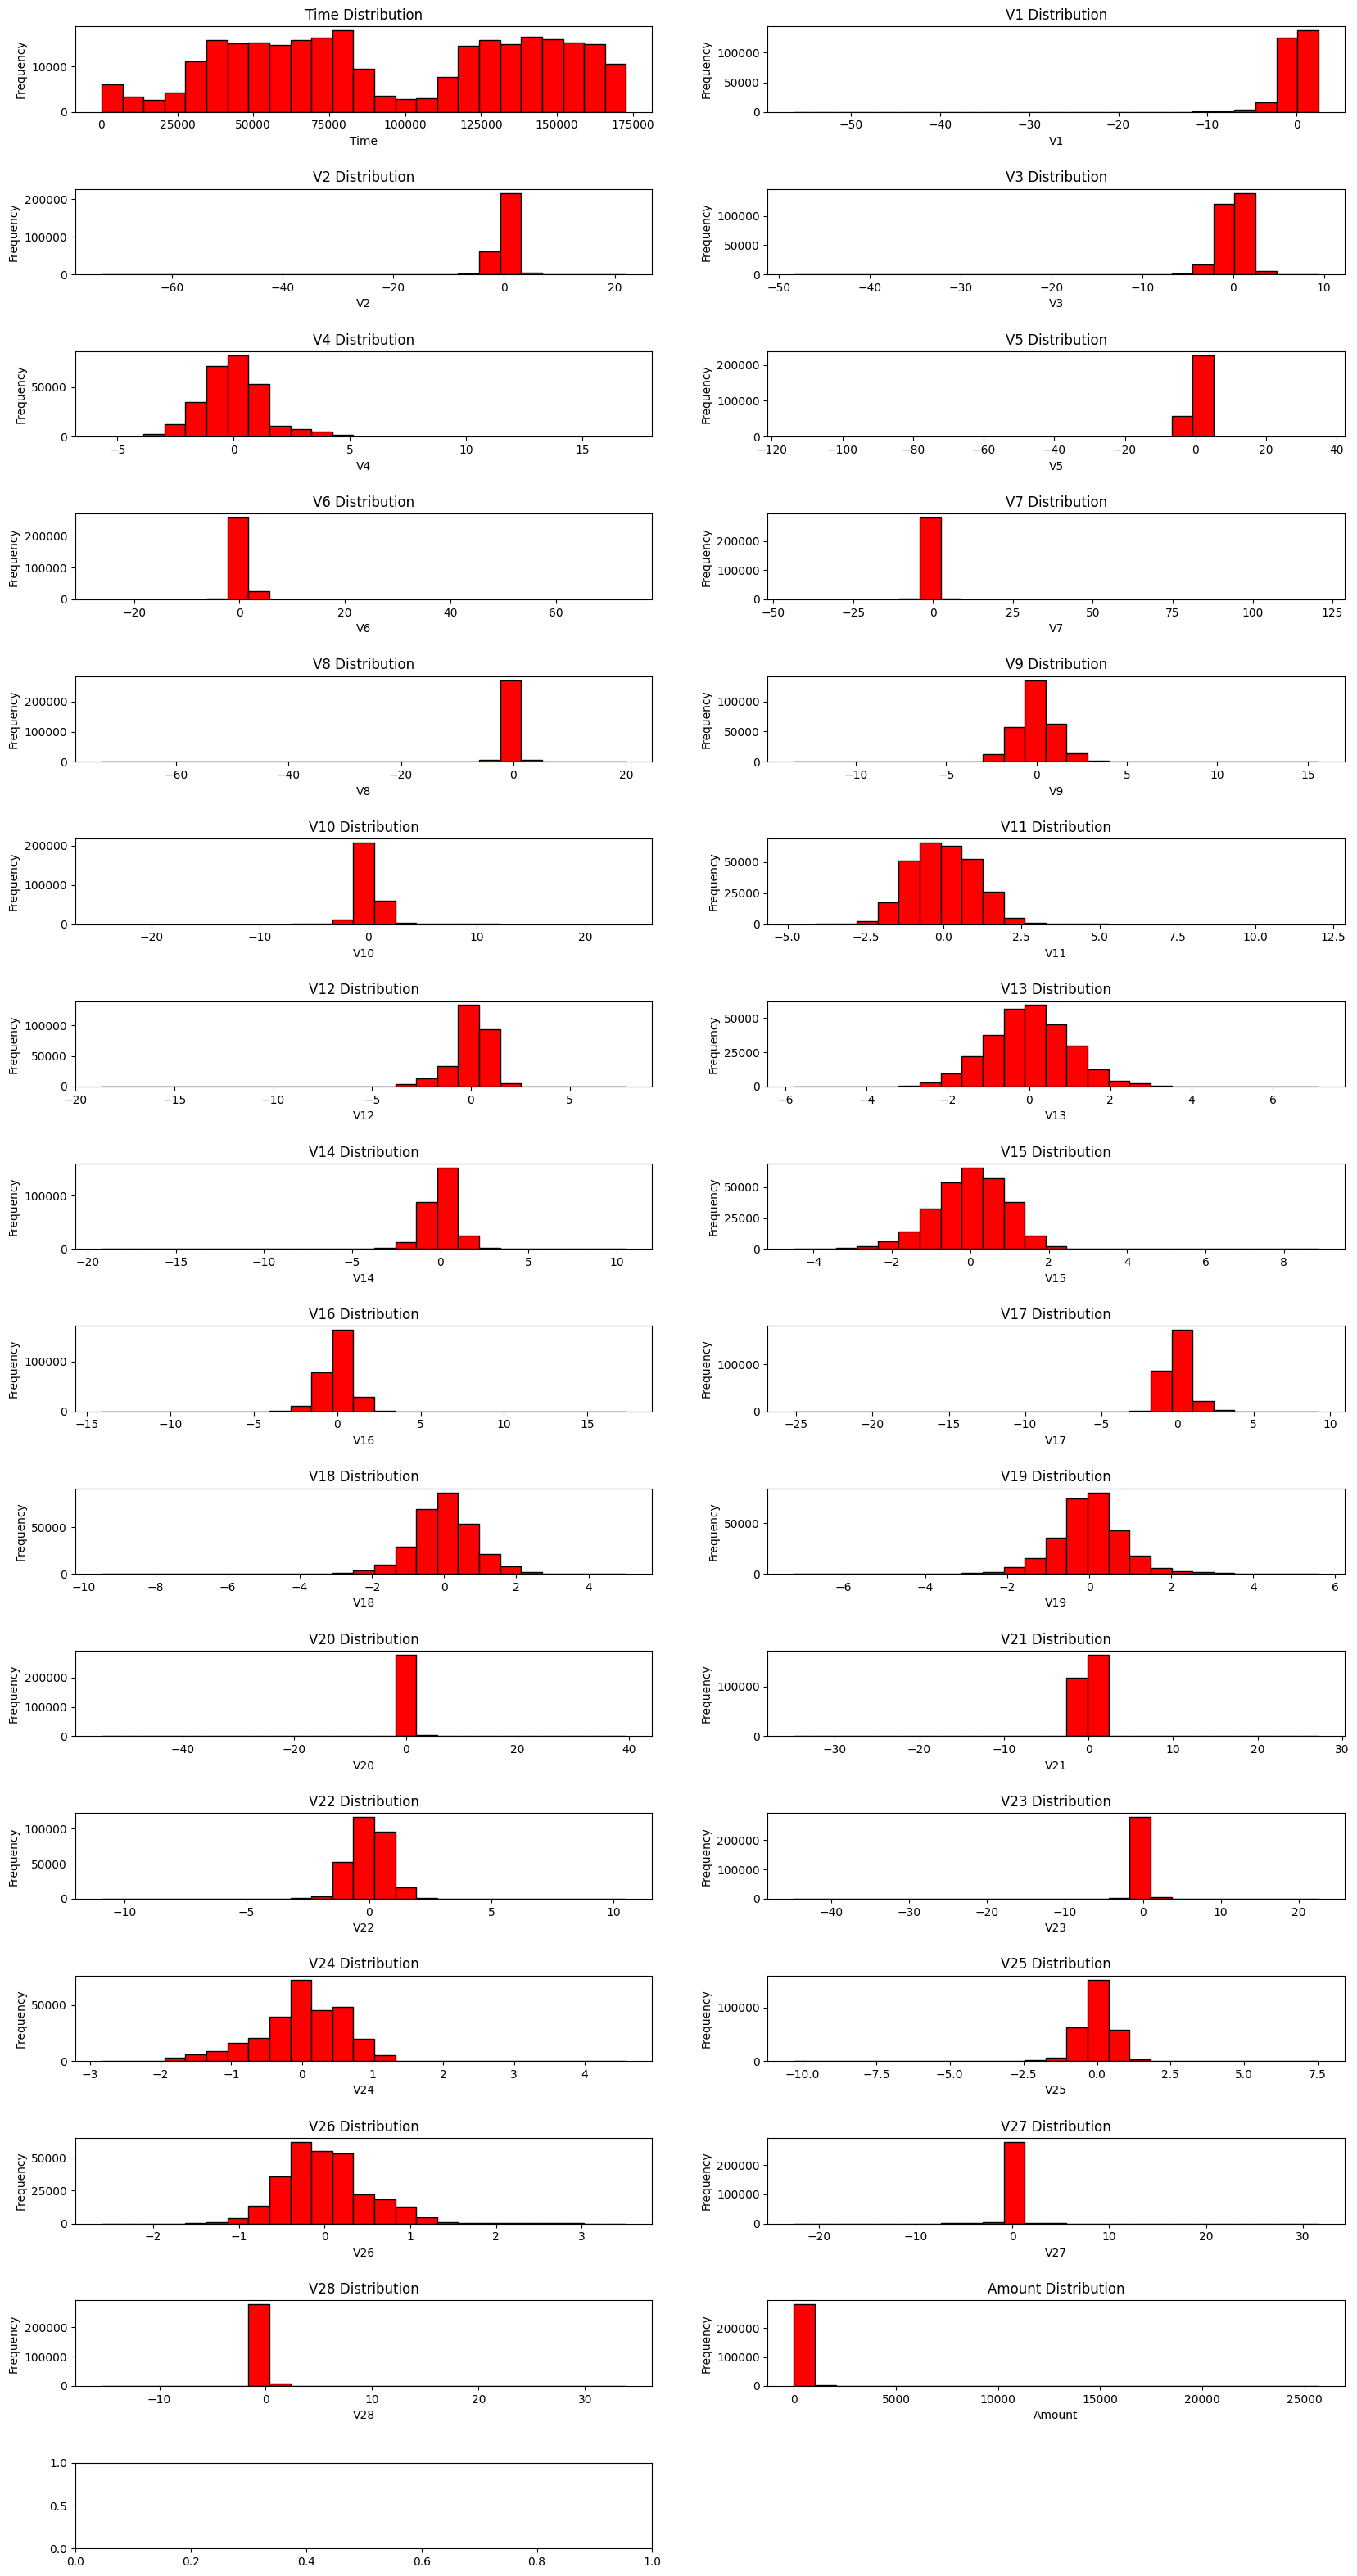

In [18]:
# Define the number of columns and rows for subplots
num_cols = df.shape[1]  # Number of columns in the DataFrame
num_rows = (num_cols - 1) // 2 + 1  # Calculate the number of rows needed for subplots

# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(20, 40))
fig.subplots_adjust(hspace=0.9)  # Adjust vertical spacing between subplots

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot histograms for each column
for i, column in enumerate(df.columns):
    if column == 'Class':
        continue  # Skip the target variable if it's in the DataFrame
    ax = axes[i]
    ax.hist(df[column], bins=25, color='Red', edgecolor='black')
    ax.set_title(f'{column} Distribution')
    ax.set_xlabel(column)  # set the label for x-axis
    ax.set_ylabel('Frequency')

# Remove any empty subplots
for i in range(len(df.columns), len(axes)):
    fig.delaxes(axes[i])

# Show the subplots
plt.show()

### **Relationship between Amount and each Class**

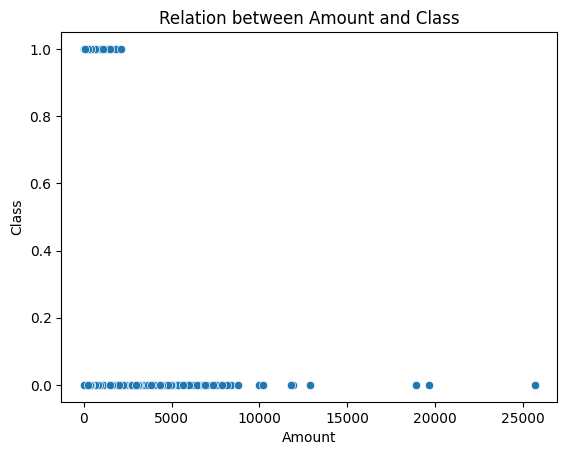

In [19]:
adr_scatter = sns.scatterplot(data = df,x = 'Amount',y = 'Class')
plt.xlabel('Amount')
plt.ylabel('Class')
plt.title('Relation between Amount and Class')
plt.show()

As we can predict from the above scatterplot, the Amount variable has some outliers.

### Removal of Outliers
An outlier is a data point that significantly deviates from the rest of the data in the column. It can be unusually high or low in value compared to the majority of data points

Let us use the "Box plot" to plot the outliers.

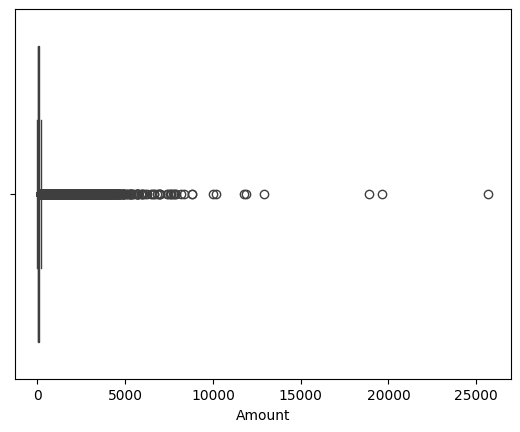

In [20]:
# Box plot to identify outliers
sns.boxplot(data=df, x='Amount')
plt.show()